In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 1000)
# Seed for reproducibility
np.random.seed(42)

# Create a dictionary with columns as keys and lists as values
data = {
    'Age': [25, 30, 22, np.nan, 28, 35, 33, 40, 27, 22, 31, 29, np.nan, 38, 24, 32, 100, 37, 28, 34],
    'Income': [50000, 60000, 48000, 75000, 52000, 45000, 68000, 80000, 55000, 90000, 67000, 59000, 53000, 72000, 49000, 65000, 73000, 69000, 54000, 71000],
    'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'High School', 'Master', 'Bachelor', 'PhD', 'High School',
                  'Master', 'Bachelor', 'PhD', 'Master', 'High School', 'Bachelor', 'PhD', 'Master', 'Bachelor', 'High School'],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Male'],
    'City': ['New York', 'Chicago', 'Los Angeles', 'San Francisco', 'Chicago', 'New York', 'Los Angeles', 'San Francisco', 'New York', 'Chicago',
             'Los Angeles', 'San Francisco', 'Chicago', 'Los Angeles', 'San Francisco', 'New York', 'San Francisco', 'Chicago', 'Los Angeles', 'New York'],
    'Productivity': [75, 80, 60, np.nan, 70, 90, 85, 78, 65, 95, 88, 75, 80, 92, 70, 85, 98, 80, 75, 82],
    'Rating': [4.2, 3.8, 4.5, 4.0, np.nan, 4.8, 4.2, 4.6, 3.9, 4.7, 4.4, 4.0, 3.8, 4.9, 4.1, 4.7, 4.3, 4.0, 4.2, 4.5],
    'Experience': [5, 3, 7, 2, 4, 6, 8, 3, 5, 10, 7, 4, np.nan, 9, 3, 6, 12, 8, 5, 7],
    'Department': ['HR', 'IT', 'Marketing', 'Finance', 'IT', 'HR', 'Marketing', 'IT', 'Finance', 'HR',
                   'Marketing', 'IT', 'Finance', 'Marketing', 'IT', 'HR', 'Finance', 'Marketing', 'IT', 'HR']
}

# Introduce missing values
for col in data:
    indices = np.random.choice(range(20), size=6, replace=False)  # Randomly select 10 indices
    data[col] = [np.nan if i in indices else val for i, val in enumerate(data[col])]

# Create a DataFrame
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)
print(df.shape)

Original DataFrame:
      Age   Income    Education  Gender           City  Productivity  Rating  Experience Department
0     NaN  50000.0          NaN     NaN            NaN          75.0     4.2         5.0        NaN
1     NaN  60000.0     Bachelor    Male        Chicago           NaN     3.8         NaN         IT
2    22.0  48000.0          NaN    Male            NaN          60.0     4.5         7.0  Marketing
3     NaN  75000.0          PhD    Male  San Francisco           NaN     4.0         NaN    Finance
4    28.0      NaN     Bachelor  Female        Chicago           NaN     NaN         4.0         IT
5     NaN      NaN          NaN    Male            NaN           NaN     NaN         NaN         HR
6    33.0  68000.0       Master     NaN    Los Angeles          85.0     4.2         8.0  Marketing
7    40.0  80000.0          NaN    Male  San Francisco          78.0     4.6         3.0        NaN
8     NaN  55000.0          PhD     NaN       New York          65.0     3.9    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           12 non-null     float64
 1   Income        14 non-null     float64
 2   Education     14 non-null     object 
 3   Gender        14 non-null     object 
 4   City          14 non-null     object 
 5   Productivity  14 non-null     float64
 6   Rating        13 non-null     float64
 7   Experience    13 non-null     float64
 8   Department    14 non-null     object 
dtypes: float64(5), object(4)
memory usage: 1.5+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.dropna(axis=0,how='all')

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department
0,NaN,50000.0,NaN,NaN,NaN,75.0,4.2,5.0,NaN
1,NaN,60000.0,Bachelor,Male,Chicago,NaN,3.8,NaN,IT
2,22.0,48000.0,NaN,Male,NaN,60.0,4.5,7.0,Marketing
3,NaN,75000.0,PhD,Male,San Francisco,NaN,4.0,NaN,Finance
4,28.0,NaN,Bachelor,Female,Chicago,NaN,NaN,4.0,IT
5,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN,HR
6,33.0,68000.0,Master,NaN,Los Angeles,85.0,4.2,8.0,Marketing
7,40.0,80000.0,NaN,Male,San Francisco,78.0,4.6,3.0,NaN
8,NaN,55000.0,PhD,NaN,New York,65.0,3.9,5.0,Finance
9,22.0,90000.0,High School,Male,Chicago,95.0,NaN,10.0,NaN


In [6]:
df.isnull().sum()

Age             8
Income          6
Education       6
Gender          6
City            6
Productivity    6
Rating          7
Experience      7
Department      6
dtype: int64

In [7]:
# Data Cleaning and Imputation
# Handling missing values using mean or median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['Productivity'].fillna(df['Productivity'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Experience'].fillna(df['Experience'].median(), inplace=True)

In [8]:
df.isnull().sum()

Age             0
Income          0
Education       6
Gender          6
City            6
Productivity    0
Rating          0
Experience      0
Department      6
dtype: int64

In [9]:
df

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department
0,30.0,50000.0,NaN,NaN,NaN,75.000000,4.200000,5.0,NaN
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT
2,22.0,48000.0,NaN,Male,NaN,60.000000,4.500000,7.0,Marketing
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT
5,30.0,64000.0,NaN,Male,NaN,78.571429,4.207692,7.0,HR
6,33.0,68000.0,Master,NaN,Los Angeles,85.000000,4.200000,8.0,Marketing
7,40.0,80000.0,NaN,Male,San Francisco,78.000000,4.600000,3.0,NaN
8,30.0,55000.0,PhD,NaN,New York,65.000000,3.900000,5.0,Finance
9,22.0,90000.0,High School,Male,Chicago,95.000000,4.207692,10.0,NaN


In [10]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df.isnull().sum()

Age             0
Income          0
Education       6
Gender          0
City            6
Productivity    0
Rating          0
Experience      0
Department      6
dtype: int64

In [11]:
df

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department
0,30.0,50000.0,NaN,Male,NaN,75.000000,4.200000,5.0,NaN
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT
2,22.0,48000.0,NaN,Male,NaN,60.000000,4.500000,7.0,Marketing
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT
5,30.0,64000.0,NaN,Male,NaN,78.571429,4.207692,7.0,HR
6,33.0,68000.0,Master,Male,Los Angeles,85.000000,4.200000,8.0,Marketing
7,40.0,80000.0,NaN,Male,San Francisco,78.000000,4.600000,3.0,NaN
8,30.0,55000.0,PhD,Male,New York,65.000000,3.900000,5.0,Finance
9,22.0,90000.0,High School,Male,Chicago,95.000000,4.207692,10.0,NaN


In [12]:
df['Education'].fillna('Others', inplace=True)
df.isnull().sum()

Age             0
Income          0
Education       0
Gender          0
City            6
Productivity    0
Rating          0
Experience      0
Department      6
dtype: int64

In [13]:
df

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department
0,30.0,50000.0,Others,Male,NaN,75.000000,4.200000,5.0,NaN
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT
2,22.0,48000.0,Others,Male,NaN,60.000000,4.500000,7.0,Marketing
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT
5,30.0,64000.0,Others,Male,NaN,78.571429,4.207692,7.0,HR
6,33.0,68000.0,Master,Male,Los Angeles,85.000000,4.200000,8.0,Marketing
7,40.0,80000.0,Others,Male,San Francisco,78.000000,4.600000,3.0,NaN
8,30.0,55000.0,PhD,Male,New York,65.000000,3.900000,5.0,Finance
9,22.0,90000.0,High School,Male,Chicago,95.000000,4.207692,10.0,NaN


In [14]:
df['Department'].fillna('Unknown', inplace=True)
df.isnull().sum()

Age             0
Income          0
Education       0
Gender          0
City            6
Productivity    0
Rating          0
Experience      0
Department      0
dtype: int64

In [15]:
df

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department
0,30.0,50000.0,Others,Male,NaN,75.000000,4.200000,5.0,Unknown
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT
2,22.0,48000.0,Others,Male,NaN,60.000000,4.500000,7.0,Marketing
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT
5,30.0,64000.0,Others,Male,NaN,78.571429,4.207692,7.0,HR
6,33.0,68000.0,Master,Male,Los Angeles,85.000000,4.200000,8.0,Marketing
7,40.0,80000.0,Others,Male,San Francisco,78.000000,4.600000,3.0,Unknown
8,30.0,55000.0,PhD,Male,New York,65.000000,3.900000,5.0,Finance
9,22.0,90000.0,High School,Male,Chicago,95.000000,4.207692,10.0,Unknown


In [16]:
df['City'].fillna(df['City'].mode()[0], inplace=True)
df.isnull().sum()

Age             0
Income          0
Education       0
Gender          0
City            0
Productivity    0
Rating          0
Experience      0
Department      0
dtype: int64

In [17]:
df

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department
0,30.0,50000.0,Others,Male,San Francisco,75.000000,4.200000,5.0,Unknown
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT
2,22.0,48000.0,Others,Male,San Francisco,60.000000,4.500000,7.0,Marketing
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT
5,30.0,64000.0,Others,Male,San Francisco,78.571429,4.207692,7.0,HR
6,33.0,68000.0,Master,Male,Los Angeles,85.000000,4.200000,8.0,Marketing
7,40.0,80000.0,Others,Male,San Francisco,78.000000,4.600000,3.0,Unknown
8,30.0,55000.0,PhD,Male,New York,65.000000,3.900000,5.0,Finance
9,22.0,90000.0,High School,Male,Chicago,95.000000,4.207692,10.0,Unknown


## Outlier Treatment

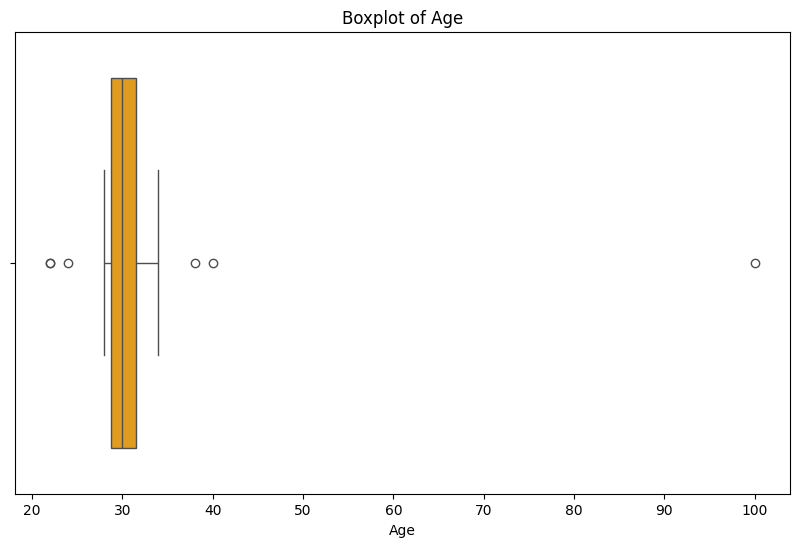

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=df, color='orange')
plt.title('Boxplot of Age')
plt.show()

In [19]:
# Outlier Detection and Imputation
# Handling potential outlier in 'Age' column
age_mean = df['Age'].mean()
age_std = df['Age'].std()
df['Age'] = np.where((df['Age'] > age_mean + 2 * age_std) | (df['Age'] < age_mean - 2 * age_std), np.nan, df['Age'])
print(df['Age'])
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age']

0     30.0
1     30.0
2     22.0
3     30.0
4     28.0
5     30.0
6     33.0
7     40.0
8     30.0
9     22.0
10    31.0
11    29.0
12    30.0
13    38.0
14    24.0
15    30.0
16     NaN
17    30.0
18    28.0
19    34.0
Name: Age, dtype: float64


0     30.0
1     30.0
2     22.0
3     30.0
4     28.0
5     30.0
6     33.0
7     40.0
8     30.0
9     22.0
10    31.0
11    29.0
12    30.0
13    38.0
14    24.0
15    30.0
16    30.0
17    30.0
18    28.0
19    34.0
Name: Age, dtype: float64

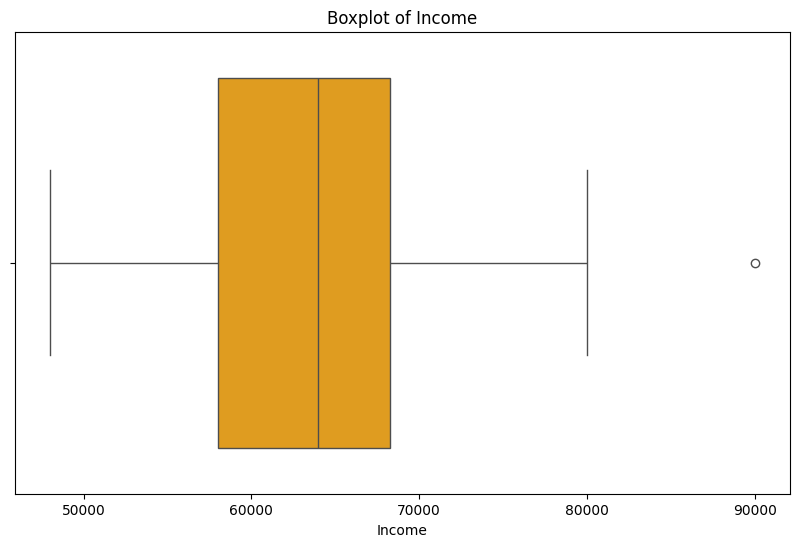

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', data=df, color='orange')
plt.title('Boxplot of Income')
plt.show()

In [70]:
quartiles = df['Income'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print('Q3 =',quartiles[0.75] , 'Q1 =', quartiles[0.25], 'IQR =', iqr)
ul = quartiles[0.75] + 1.5*iqr
ll = quartiles[0.25] - 1.5*iqr
print('UL is', ul, 'LL is',ll)
outliers = df[(df['Income'] > ul) | (df['Income'] < ll)]['Income']
print('Outliers', outliers)

Q3 = 68250.0 Q1 = 58000.0 IQR = 10250.0
UL is 83625.0 LL is 42625.0
Outliers 9    90000.0
Name: Income, dtype: float64


In [73]:
df['Income'].replace(outliers.iloc[0], np.percentile(df['Income'],50),inplace=True)
df['Income']

0     50000.0
1     60000.0
2     48000.0
3     75000.0
4     64000.0
5     64000.0
6     68000.0
7     80000.0
8     55000.0
9     64000.0
10    67000.0
11    59000.0
12    64000.0
13    72000.0
14    49000.0
15    64000.0
16    64000.0
17    69000.0
18    54000.0
19    64000.0
Name: Income, dtype: float64

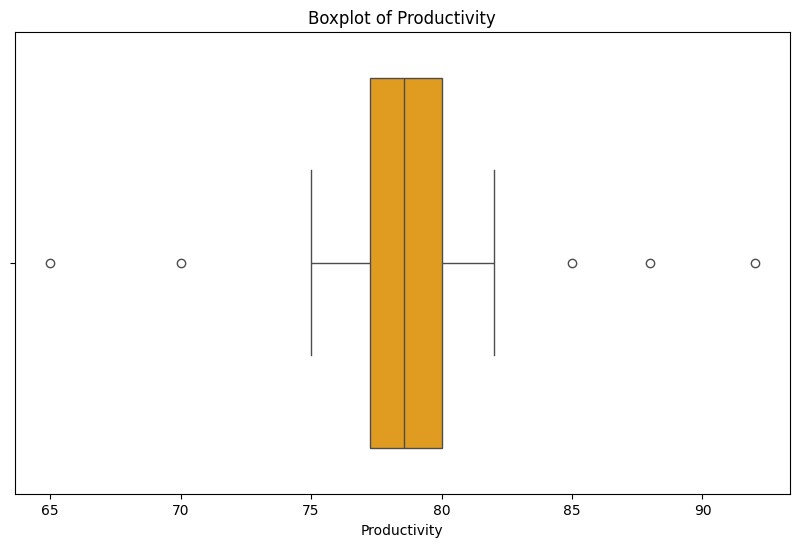

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Productivity', data=df, color='orange')
plt.title('Boxplot of Productivity')
plt.show()

In [75]:
prod_mean = df['Productivity'].mean()
prod_std = df['Productivity'].std()
df['Productivity'] = np.where((df['Productivity'] > prod_mean + 2 * prod_std) | (df['Productivity'] < prod_mean - 2 * prod_std), np.nan, df['Productivity'])
print(df['Productivity'])
df['Productivity'].fillna(df['Productivity'].median(), inplace=True)
df['Productivity']

0     75.000000
1     78.571429
2     78.571429
3     78.571429
4     78.571429
5     78.571429
6     85.000000
7     78.000000
8           NaN
9     78.571429
10    88.000000
11    75.000000
12    80.000000
13          NaN
14    70.000000
15    78.571429
16    78.571429
17    80.000000
18    75.000000
19    82.000000
Name: Productivity, dtype: float64


0     75.000000
1     78.571429
2     78.571429
3     78.571429
4     78.571429
5     78.571429
6     85.000000
7     78.000000
8     78.571429
9     78.571429
10    88.000000
11    75.000000
12    80.000000
13    78.571429
14    70.000000
15    78.571429
16    78.571429
17    80.000000
18    75.000000
19    82.000000
Name: Productivity, dtype: float64

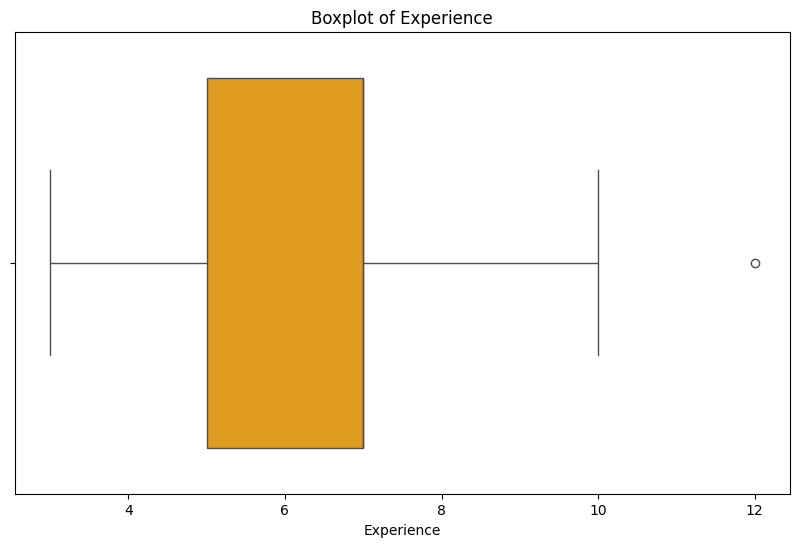

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience', data=df, color='orange')
plt.title('Boxplot of Experience')
plt.show()

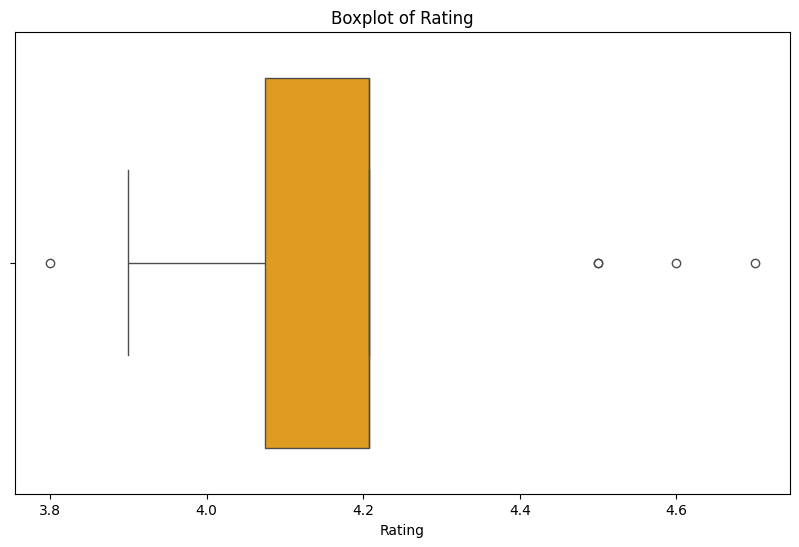

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', data=df, color='orange')
plt.title('Boxplot of Rating')
plt.show()

## EDA

In [78]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             Age        Income  Productivity     Rating  Experience  Education_tranform
count  20.000000     20.000000     20.000000  20.000000   20.000000           20.000000
mean   29.950000  62700.000000     78.685714   4.207692    6.650000            2.150000
std     4.370656   8448.606238      3.683971   0.225859    2.230766            1.460894
min    22.000000  48000.000000     70.000000   3.800000    3.000000            0.000000
25%    28.750000  58000.000000     78.428571   4.075000    5.000000            1.000000
50%    30.000000  64000.000000     78.571429   4.207692    7.000000            2.500000
75%    30.250000  67250.000000     78.928571   4.207692    7.000000            3.000000
max    40.000000  80000.000000     88.000000   4.700000   12.000000            4.000000


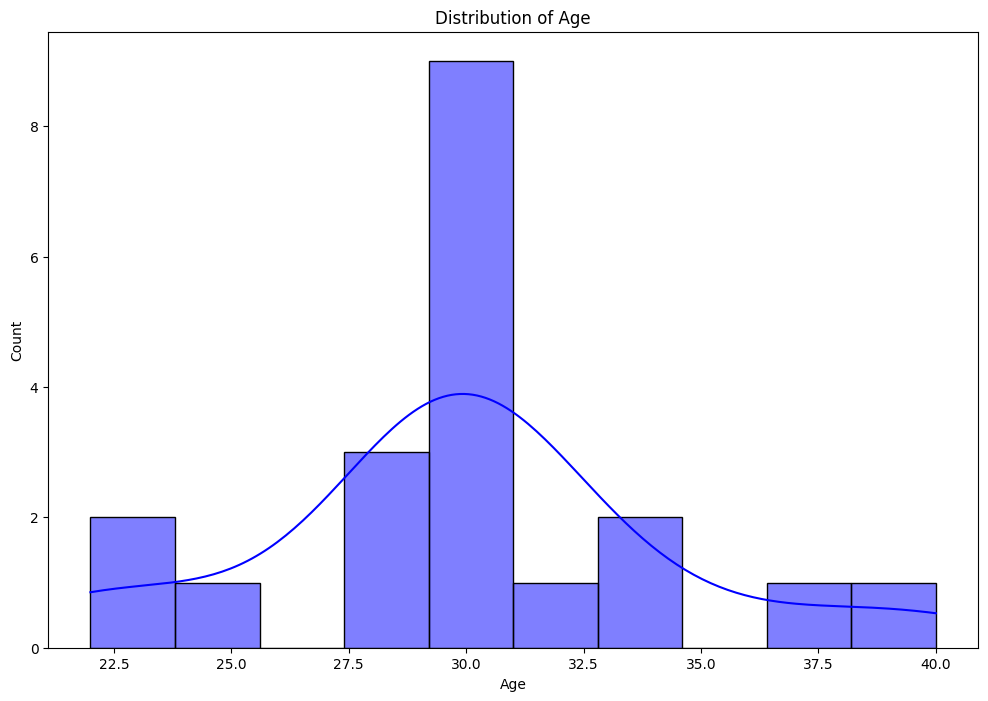

In [79]:
# Visualizing the distribution of numerical columns
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=10, kde=True, color='blue')
plt.title('Distribution of Age')
plt.show()

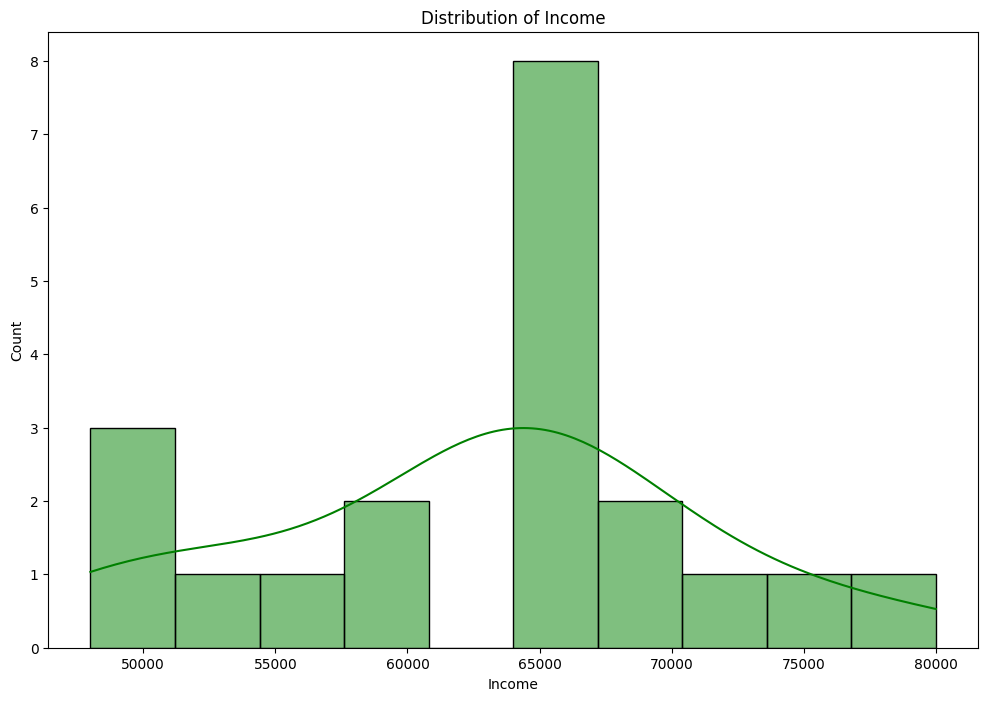

In [80]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Income'], bins=10, kde=True, color='green')
plt.title('Distribution of Income')
plt.show()

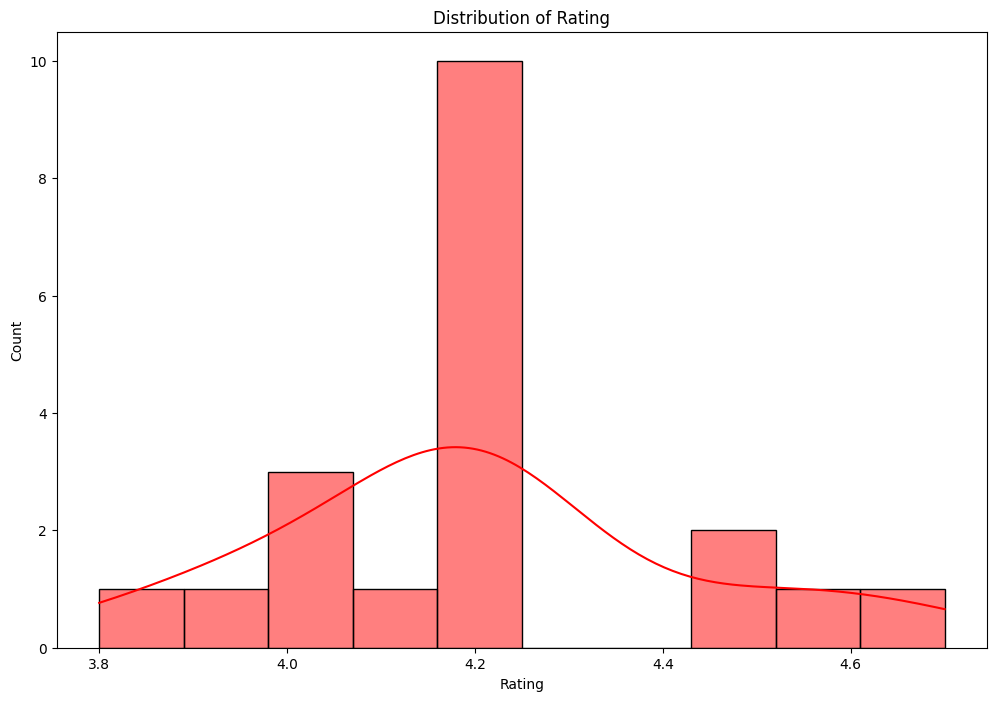

In [81]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Rating'], bins=10, kde=True, color='red')
plt.title('Distribution of Rating')
plt.show()

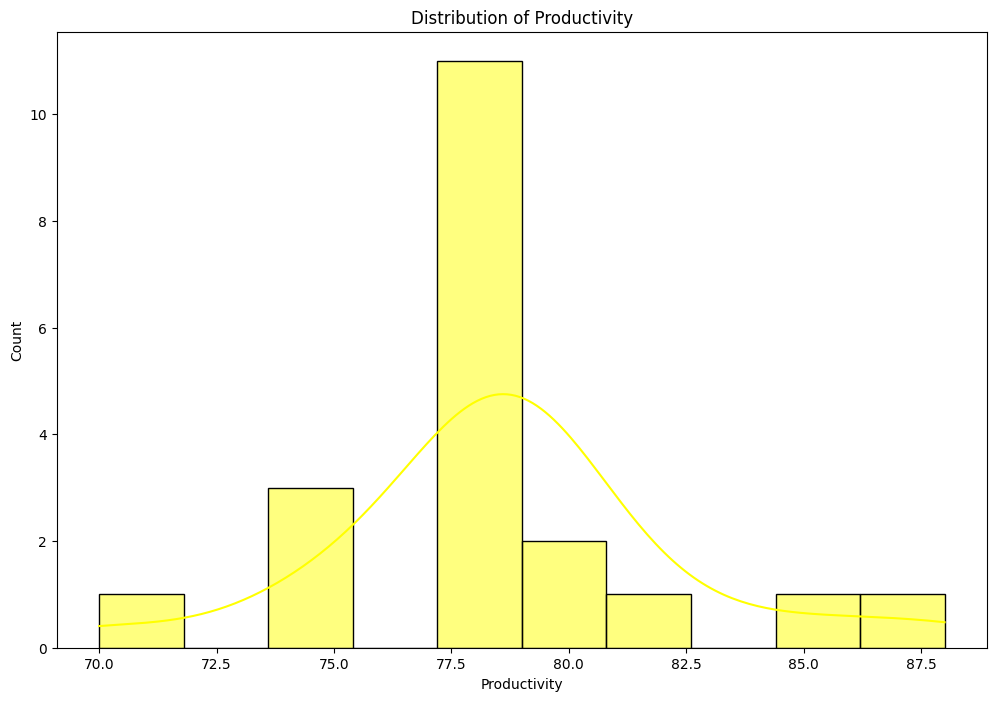

In [82]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Productivity'], bins=10, kde=True, color='yellow')
plt.title('Distribution of Productivity')
plt.show()

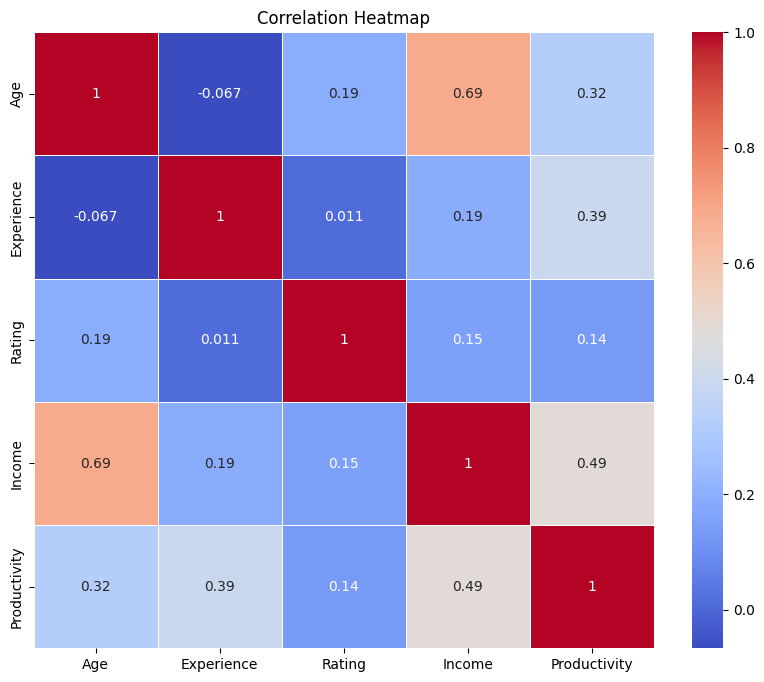

In [83]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age','Experience','Rating', 'Income','Productivity']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [84]:
bins = [40000, 55000, 70000, 85000]
df['Income_binned'] = pd.cut(df['Income'], bins, labels=['Low', 'Medium', 'High'])
df

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department,Income_binned,Education_tranform
0,30.0,50000.0,Others,Male,San Francisco,75.000000,4.200000,5.0,Unknown,Low,3
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT,Medium,0
2,22.0,48000.0,Others,Male,San Francisco,78.571429,4.500000,7.0,Marketing,Low,3
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance,High,4
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT,Medium,0
5,30.0,64000.0,Others,Male,San Francisco,78.571429,4.207692,7.0,HR,Medium,3
6,33.0,68000.0,Master,Male,Los Angeles,85.000000,4.200000,8.0,Marketing,Medium,2
7,40.0,80000.0,Others,Male,San Francisco,78.000000,4.600000,3.0,Unknown,High,3
8,30.0,55000.0,PhD,Male,New York,78.571429,3.900000,5.0,Finance,Low,4
9,22.0,64000.0,High School,Male,Chicago,78.571429,4.207692,10.0,Unknown,Medium,1


<Axes: xlabel='Gender', ylabel='Income'>

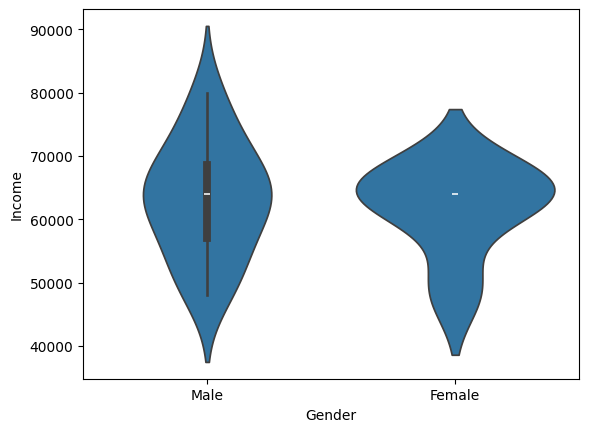

In [85]:
sns.violinplot(data=df, x='Gender', y='Income')

<Axes: xlabel='Gender', ylabel='count'>

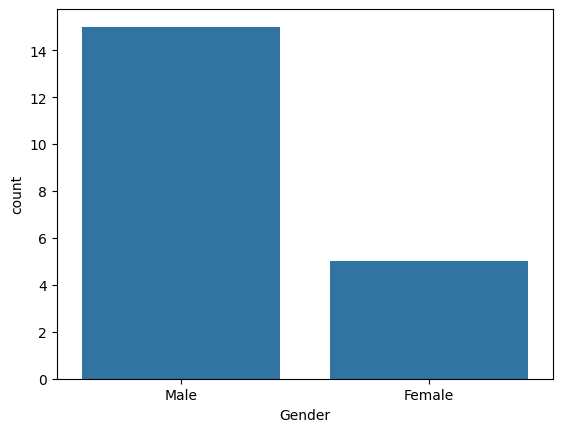

In [86]:
sns.countplot(df,x='Gender')

<Axes: xlabel='Income_binned', ylabel='count'>

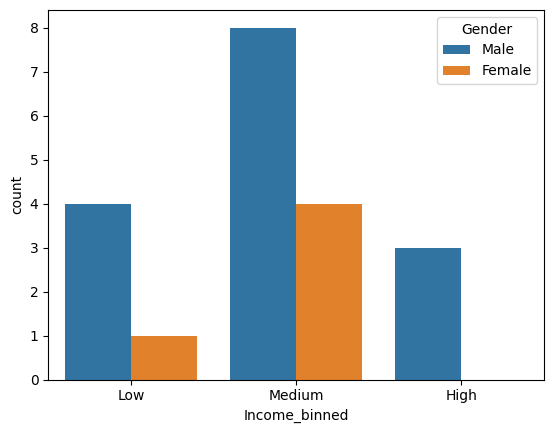

In [87]:
sns.countplot(df, x='Income_binned', hue='Gender')

<Axes: xlabel='City', ylabel='Income'>

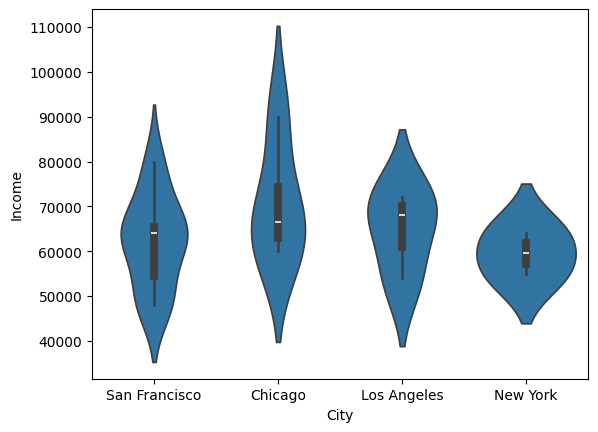

In [37]:
sns.violinplot(data=df, x='City', y='Income')

<Axes: xlabel='City', ylabel='count'>

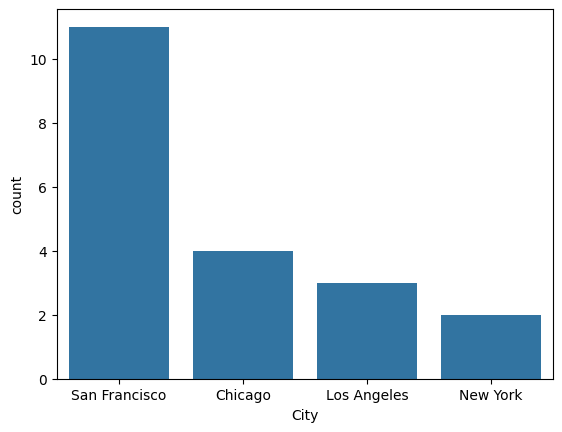

In [38]:
sns.countplot(df,x='City')

<Axes: xlabel='Income_binned', ylabel='count'>

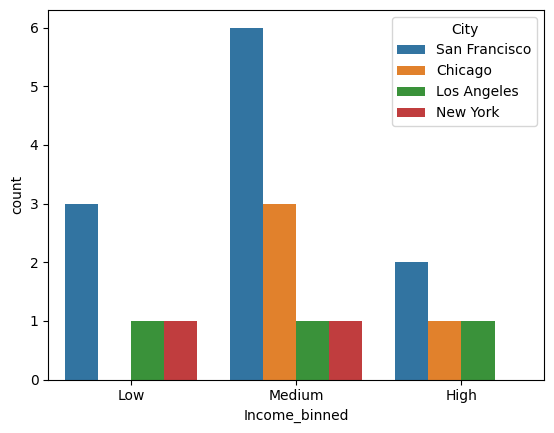

In [39]:
sns.countplot(data=df, hue='City', x='Income_binned')

In [40]:
df

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department,Income_binned
0,30.0,50000.0,Others,Male,San Francisco,75.000000,4.200000,5.0,Unknown,Low
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT,Medium
2,22.0,48000.0,Others,Male,San Francisco,78.571429,4.500000,7.0,Marketing,Low
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance,High
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT,Medium
5,30.0,64000.0,Others,Male,San Francisco,78.571429,4.207692,7.0,HR,Medium
6,33.0,68000.0,Master,Male,Los Angeles,85.000000,4.200000,8.0,Marketing,Medium
7,40.0,80000.0,Others,Male,San Francisco,78.000000,4.600000,3.0,Unknown,High
8,30.0,55000.0,PhD,Male,New York,65.000000,3.900000,5.0,Finance,Low
9,22.0,90000.0,High School,Male,Chicago,78.571429,4.207692,10.0,Unknown,High


<Axes: xlabel='Department', ylabel='count'>

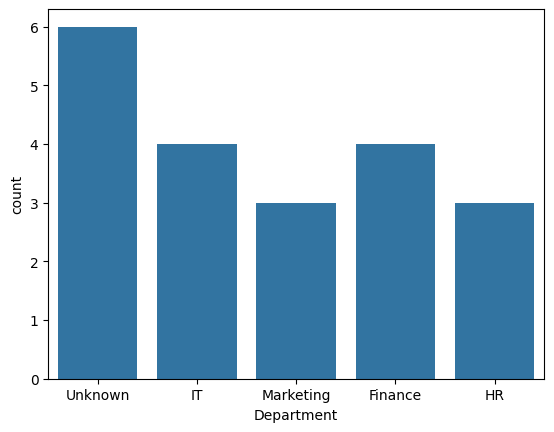

In [41]:
sns.countplot(df,x='Department')

<Axes: xlabel='Income_binned', ylabel='count'>

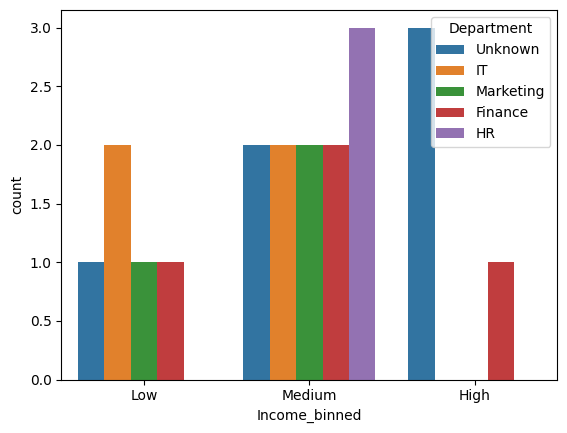

In [42]:
sns.countplot(data=df, hue='Department', x='Income_binned')

<Axes: xlabel='Income', ylabel='Productivity'>

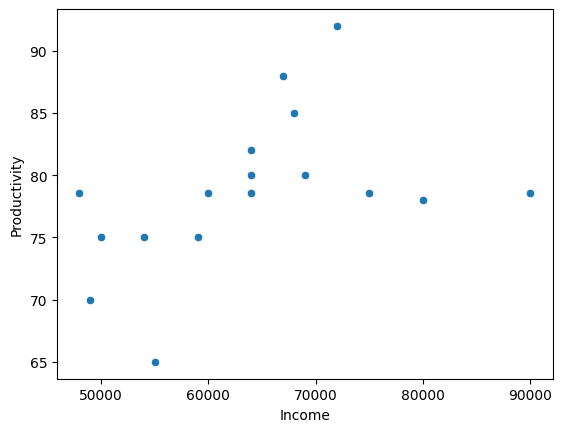

In [43]:
sns.scatterplot(df,x=df['Income'],y=df['Productivity'])

In [44]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[['Education','Gender','City','Department']])
X = enc.transform(df[['Education','Gender','City','Department']])
X

array([[3., 1., 3., 4.],
       [0., 1., 0., 2.],
       [3., 1., 3., 3.],
       [4., 1., 3., 0.],
       [0., 0., 0., 2.],
       [3., 1., 3., 1.],
       [2., 1., 1., 3.],
       [3., 1., 3., 4.],
       [4., 1., 2., 0.],
       [1., 1., 0., 4.],
       [3., 0., 3., 3.],
       [0., 1., 3., 4.],
       [4., 0., 3., 0.],
       [2., 1., 1., 4.],
       [1., 0., 3., 2.],
       [0., 1., 2., 1.],
       [4., 0., 3., 0.],
       [2., 1., 0., 4.],
       [3., 1., 1., 2.],
       [1., 1., 3., 1.]])

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Education'])
df['Education_tranform'] = le.transform(df['Education'])
df

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department,Income_binned,Education_tranform
0,30.0,50000.0,Others,Male,San Francisco,75.000000,4.200000,5.0,Unknown,Low,3
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT,Medium,0
2,22.0,48000.0,Others,Male,San Francisco,78.571429,4.500000,7.0,Marketing,Low,3
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance,High,4
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT,Medium,0
5,30.0,64000.0,Others,Male,San Francisco,78.571429,4.207692,7.0,HR,Medium,3
6,33.0,68000.0,Master,Male,Los Angeles,85.000000,4.200000,8.0,Marketing,Medium,2
7,40.0,80000.0,Others,Male,San Francisco,78.000000,4.600000,3.0,Unknown,High,3
8,30.0,55000.0,PhD,Male,New York,65.000000,3.900000,5.0,Finance,Low,4
9,22.0,90000.0,High School,Male,Chicago,78.571429,4.207692,10.0,Unknown,High,1


In [46]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['Education']])
enc.transform(df[['Education']]).toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [47]:
!pip install category-encoders


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\SLP12912\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
from category_encoders.binary import BinaryEncoder
be = BinaryEncoder()
be.fit(df[['Education']])
be.transform(df[['Education']])

,Education_0,Education_1,Education_2
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,0,1
8,0,1,1
9,1,0,1


In [49]:
df

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department,Income_binned,Education_tranform
0,30.0,50000.0,Others,Male,San Francisco,75.000000,4.200000,5.0,Unknown,Low,3
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT,Medium,0
2,22.0,48000.0,Others,Male,San Francisco,78.571429,4.500000,7.0,Marketing,Low,3
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance,High,4
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT,Medium,0
5,30.0,64000.0,Others,Male,San Francisco,78.571429,4.207692,7.0,HR,Medium,3
6,33.0,68000.0,Master,Male,Los Angeles,85.000000,4.200000,8.0,Marketing,Medium,2
7,40.0,80000.0,Others,Male,San Francisco,78.000000,4.600000,3.0,Unknown,High,3
8,30.0,55000.0,PhD,Male,New York,65.000000,3.900000,5.0,Finance,Low,4
9,22.0,90000.0,High School,Male,Chicago,78.571429,4.207692,10.0,Unknown,High,1


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
scaler.transform(df[['Age']])

array([[0.44444444],
       [0.44444444],
       [0.        ],
       [0.44444444],
       [0.33333333],
       [0.44444444],
       [0.61111111],
       [1.        ],
       [0.44444444],
       [0.        ],
       [0.5       ],
       [0.38888889],
       [0.44444444],
       [0.88888889],
       [0.11111111],
       [0.44444444],
       [0.44444444],
       [0.44444444],
       [0.33333333],
       [0.66666667]])

In [51]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
stdscaler.fit(df[['Age']])
stdscaler.transform(df[['Age']])

array([[ 0.01173712],
       [ 0.01173712],
       [-1.86620232],
       [ 0.01173712],
       [-0.45774774],
       [ 0.01173712],
       [ 0.71596441],
       [ 2.35916143],
       [ 0.01173712],
       [-1.86620232],
       [ 0.24647955],
       [-0.22300531],
       [ 0.01173712],
       [ 1.88967657],
       [-1.39671746],
       [ 0.01173712],
       [ 0.01173712],
       [ 0.01173712],
       [-0.45774774],
       [ 0.95070684]])

In [52]:
df.head()

,Age,Income,Education,Gender,City,Productivity,Rating,Experience,Department,Income_binned,Education_tranform
0,30.0,50000.0,Others,Male,San Francisco,75.000000,4.200000,5.0,Unknown,Low,3
1,30.0,60000.0,Bachelor,Male,Chicago,78.571429,3.800000,7.0,IT,Medium,0
2,22.0,48000.0,Others,Male,San Francisco,78.571429,4.500000,7.0,Marketing,Low,3
3,30.0,75000.0,PhD,Male,San Francisco,78.571429,4.000000,7.0,Finance,High,4
4,28.0,64000.0,Bachelor,Female,Chicago,78.571429,4.207692,4.0,IT,Medium,0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Productivity','Experience']], df['Income'], test_size=0.33, random_state=42)

In [54]:
X_train.shape

(13, 2)

In [55]:
X_test.shape

(7, 2)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df[['Productivity','Experience']], df['Income_binned'], test_size=0.33, random_state=42)

In [57]:
y_train.value_counts()

Income_binned
Medium    6
High      4
Low       3
Name: count, dtype: int64

In [58]:
y_test.value_counts()

Income_binned
Medium    5
Low       2
High      0
Name: count, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df[['Productivity','Experience']], df['Income_binned'], test_size=0.33, random_state=42, stratify=df['Income_binned'])
print(y_train.value_counts())
print(y_test.value_counts())

Income_binned
Medium    7
Low       3
High      3
Name: count, dtype: int64
Income_binned
Medium    4
Low       2
High      1
Name: count, dtype: int64
